In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
X=df[['Age']]
y=df[['Purchased']]

<AxesSubplot:xlabel='Age', ylabel='Purchased'>

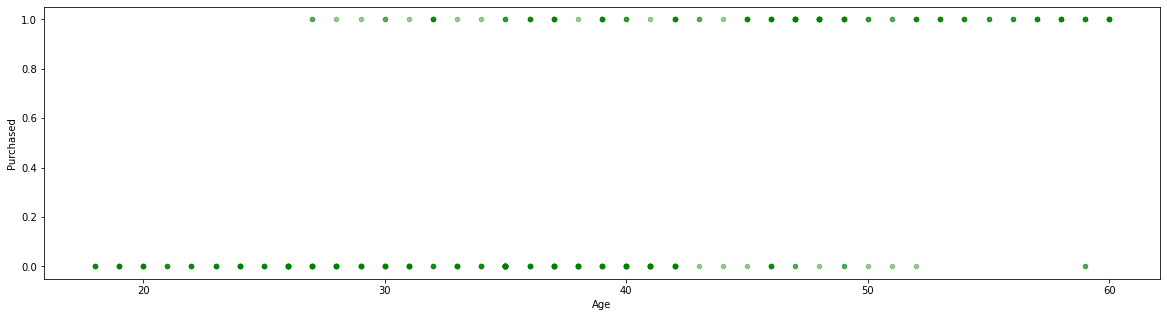

In [7]:
df.plot(kind='scatter',x='Age',y='Purchased',color='green',alpha=.4,figsize=(20,5))

In [8]:
px.scatter(df,x='Age',y='EstimatedSalary',color='Purchased', symbol='Purchased')

<AxesSubplot:>

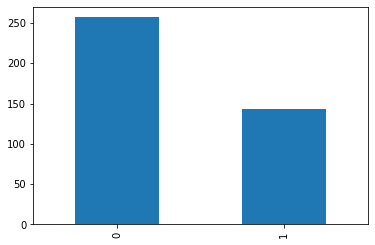

In [9]:
df.Purchased.value_counts().plot(kind='bar')

In [10]:
X=df[['Age','EstimatedSalary']]
y=df[['Purchased']]
scaler = StandardScaler()
scaledX = scaler.fit_transform(X)
xtrain,xtest,ytrain,ytest = train_test_split(scaledX,y,test_size=.2)
xtrain.shape,xtest.shape

((320, 2), (80, 2))

In [11]:
m=LogisticRegression()
m.fit(xtrain,ytrain)

C:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression()

In [12]:
m.score(xtest,ytest) # we should not see the score like this, we use other stuff

0.8875

In [13]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [14]:
ypred = m.predict(xtest)

In [15]:
import seaborn as sns

In [16]:
cn = confusion_matrix(ytest,ypred)
print(cn)

[[51  4]
 [ 5 20]]


In [17]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        55
           1       0.83      0.80      0.82        25

    accuracy                           0.89        80
   macro avg       0.87      0.86      0.87        80
weighted avg       0.89      0.89      0.89        80



In [19]:
from matplotlib.colors import ListedColormap
import numpy as np

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

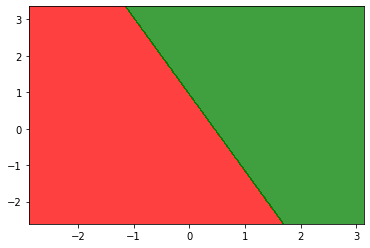

In [22]:
from utils import plot_area_distribution
plot_area_distribution(m,xtrain,ytrain,"logistic",'Salary','age')

# prediction

In [18]:
sal = int(input("Enter salary of viewer"))
inp = [[sal]] #vector
print(m.predict(inp)[0])

KeyboardInterrupt: Interrupted by user